In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 72E3-1983

 Directory of C:\Users\kulde\ExcelR\Assignment Practice\Multi Linear Regression

18-11-2022  12:32    <DIR>          .
14-11-2022  09:45    <DIR>          ..
07-11-2022  16:13    <DIR>          .ipynb_checkpoints
04-11-2022  18:07             2,436 50_Startups.csv
04-11-2022  18:07               468 proble_statement(50_startups).txt
18-11-2022  12:32           853,844 Startups_50.ipynb
04-11-2022  18:07             1,752 Toyota Corolla.txt
18-11-2022  10:45         1,678,792 Toyota_corolla.ipynb
04-11-2022  18:07           224,041 ToyotaCorolla.csv
               6 File(s)      2,761,333 bytes
               3 Dir(s)  356,242,694,144 bytes free


In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
Startups_50=pd.read_csv("50_Startups.csv")
Startups_50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
Startups_50 = pd.get_dummies(Startups_50, columns = ['State'])
Startups_50.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [6]:
Startups_50 = Startups_50.rename({'R&D Spend': 'R_D','State_New York':'State_New_York' ,'Marketing Spend': 'Marketing'}, axis=1)
Startups_50.head(2)

,R_D,Administration,Marketing,Profit,State_California,State_Florida,State_New_York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [7]:
column_to_move = Startups_50.pop("Profit")
Startups_50.insert(6, "Profit", column_to_move)

In [8]:
Startups_50.head()

,R_D,Administration,Marketing,State_California,State_Florida,State_New_York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


# Check if the features are independent of each other using = correlation 

<AxesSubplot:>

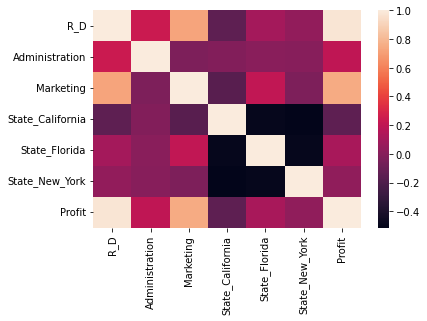

In [9]:
sns.heatmap(Startups_50.corr())

In [10]:
Startups_50.corr()

,R_D,Administration,Marketing,State_California,State_Florida,State_New_York,Profit
R_D,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068,0.972900
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145,0.200717
Marketing,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670,0.747766
State_California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152,-0.145837
State_Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366,0.116244
State_New_York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000,0.031368
Profit,0.972900,0.200717,0.747766,-0.145837,0.116244,0.031368,1.000000


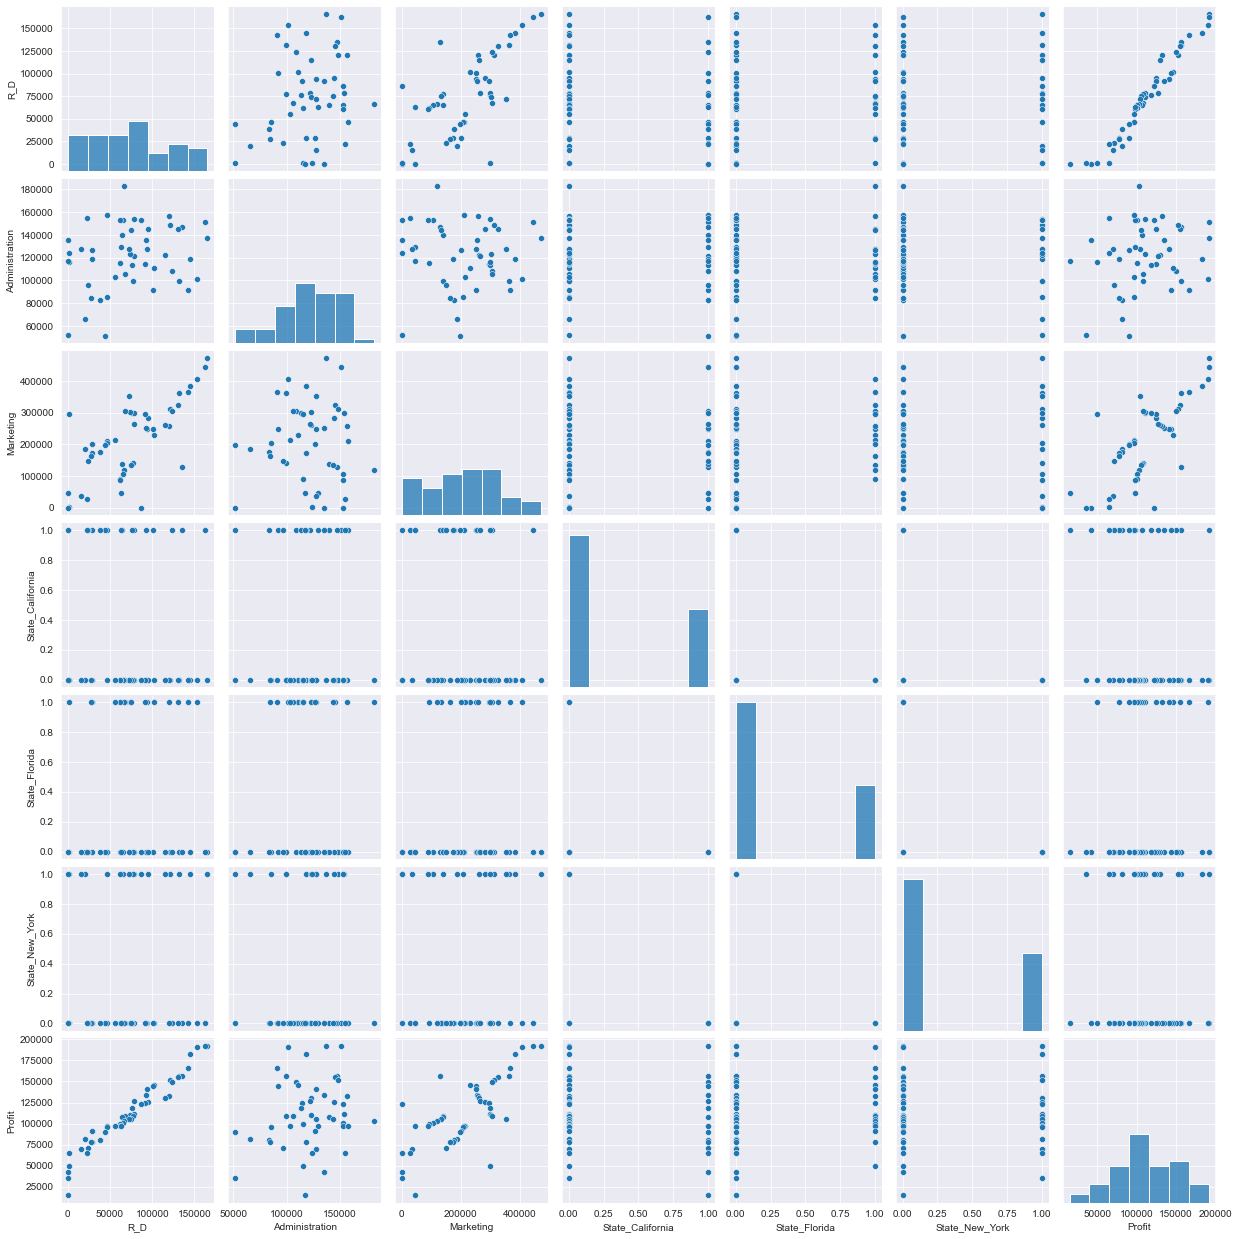

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups_50)

# Check if the features are independent of each other using = VIF(Variance inflation factor) <10

In [12]:
rsq_R_D = smf.ols('R_D~Administration+Marketing+State_California+State_Florida+State_New_York',data=Startups_50).fit().rsquared  
vif_R_D = 1/(1-rsq_R_D) # 19

rsq_Administration = smf.ols('Administration~R_D+Marketing+State_California+State_Florida+State_New_York',data=Startups_50).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) # 625

rsq_Marketing = smf.ols('Marketing~Administration+R_D+State_California+State_Florida+State_New_York',data=Startups_50).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)

rsq_State_California = smf.ols('State_California~Administration+R_D+Marketing+State_California+State_New_York',data=Startups_50).fit().rsquared  
vif_State_California = 1/(1-rsq_State_California) # 19

rsq_State_Florida = smf.ols('State_Florida~Administration+R_D+Marketing+State_California+State_New_York',data=Startups_50).fit().rsquared  
vif_State_Florida = 1/(1-rsq_State_Florida) # 625

rsq_State_New_York = smf.ols('State_New_York~Administration+R_D+Marketing+State_California+State_Florida',data=Startups_50).fit().rsquared  
vif_State_New_York = 1/(1-rsq_State_New_York)


d1 = {'Variables':['R_D','Administration','Marketing','State_California','State_Florida','State_New_York'],'VIF':[vif_R_D,vif_Administration,vif_Marketing,vif_State_California,vif_State_Florida,vif_State_New_York]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [13]:
Startups_50.isna().sum()

R_D                 0
Administration      0
Marketing           0
State_California    0
State_Florida       0
State_New_York      0
Profit              0
dtype: int64

In [14]:
model = smf.ols('Profit~R_D+Administration+Marketing+State_California+State_Florida+State_New_York',data=Startups_50).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        12:34:00   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R_D                  0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing            0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model1 = smf.ols('Profit~R_D+Marketing+State_California+State_Florida+State_New_York',data=Startups_50).fit()

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.72e-29
Time:                        12:34:00   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
R_D                  0.7967      0.042     18.771      0.000       0.711       0.882
Marketing            0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
State_Florida     1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
State_New_York    1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
model1.rsquared

0.950453304509085

In [19]:
model1.params, model.params

(Intercept           35249.524615
 R_D                     0.796743
 Marketing               0.029751
 State_California    11709.420368
 State_Florida       11850.207314
 State_New_York      11689.896933
 dtype: float64,
 Intercept           37633.233317
 R_D                     0.806023
 Administration         -0.027004
 Marketing               0.026980
 State_California    12492.110514
 State_Florida       12690.899307
 State_New_York      12450.223495
 dtype: float64)

In [20]:
(model.rsquared,model1.rsquared)

(0.9507524843355148, 0.950453304509085)

# Check if regressor and residuals are independent of each other

In [21]:
x=Startups_50.iloc[:,0:-1]
y=Startups_50['Profit']

eval_env: 1


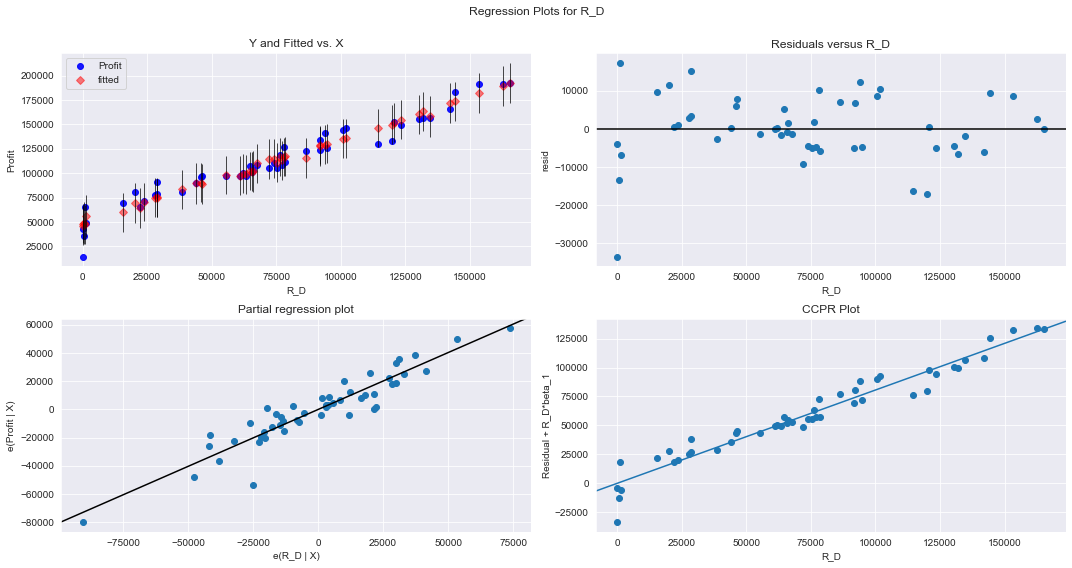

In [22]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "R_D", fig=fig)
plt.show()

eval_env: 1


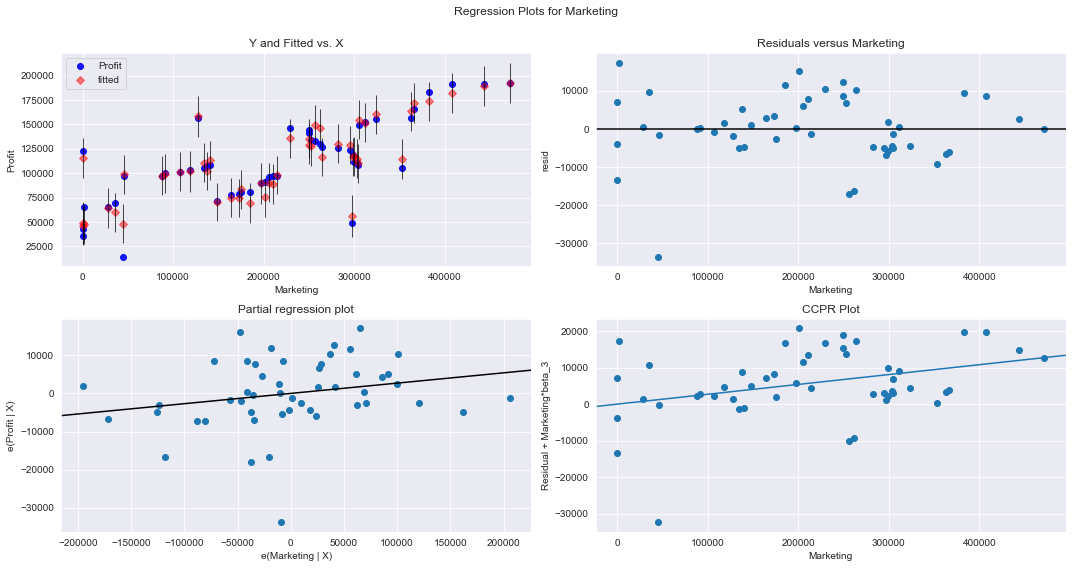

In [23]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

eval_env: 1


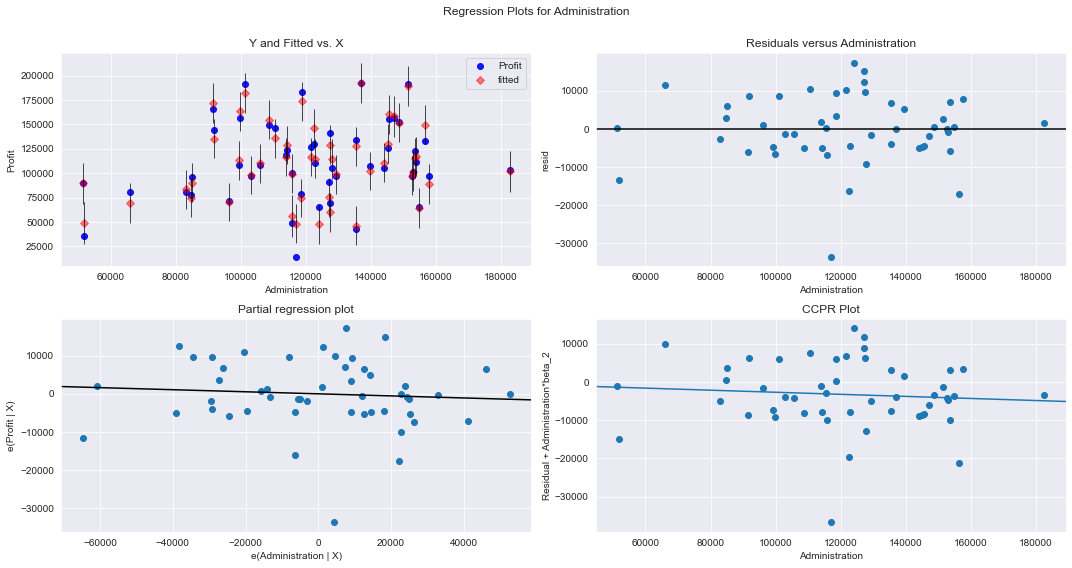

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


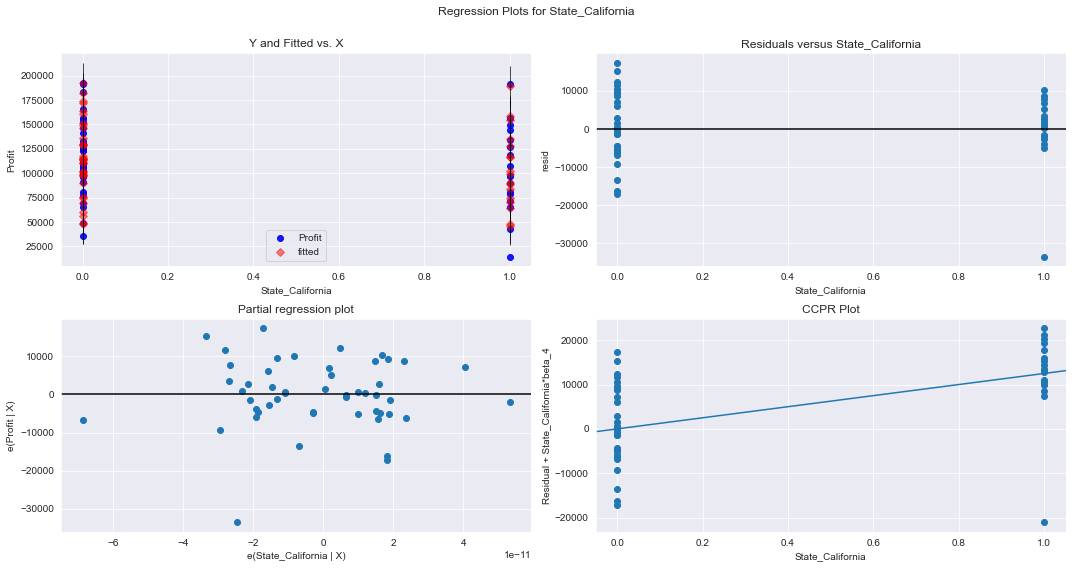

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "State_California", fig=fig)
plt.show()

eval_env: 1


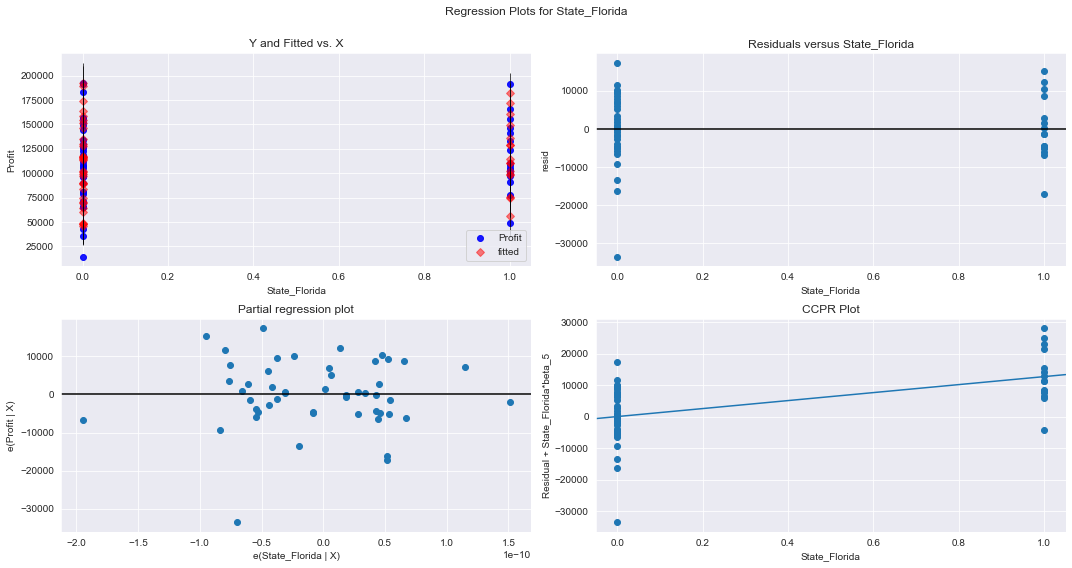

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "State_Florida", fig=fig)
plt.show()

eval_env: 1


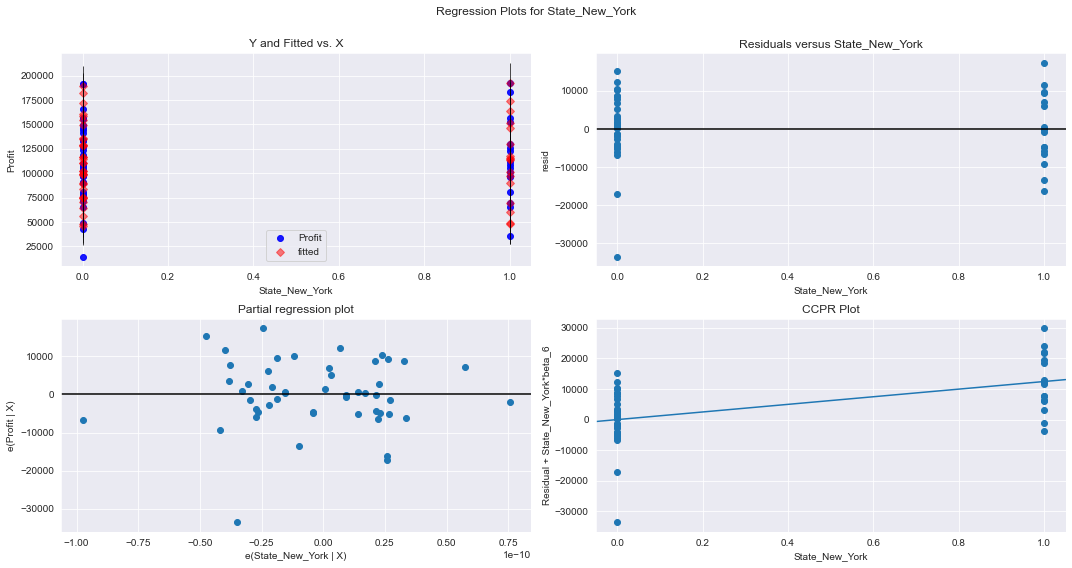

In [27]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "State_New_York" , fig=fig)
plt.show()

# Check if errors are coming from normal distribution

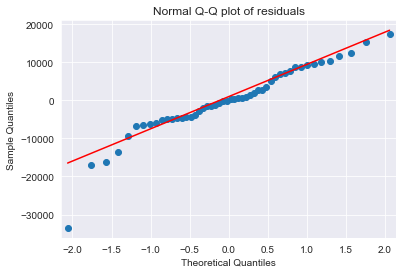

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

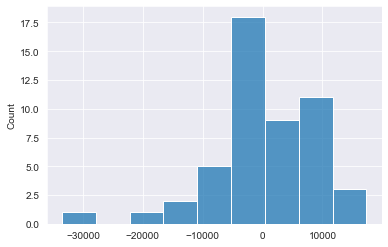

In [29]:
import seaborn as sns
sns.histplot(model.resid);

# Homoscedesticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

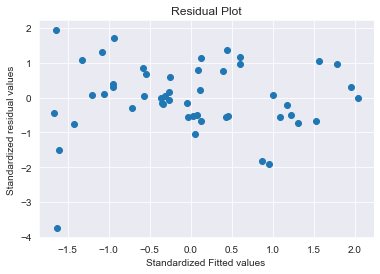

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

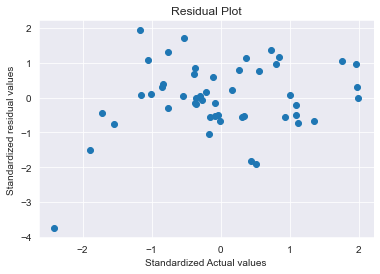

In [32]:
plt.scatter(get_standardized_values(Startups_50.Profit),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

# Cook's distance for  outlier

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [34]:
K=6
N=50
3*(K+1)/N

0.42

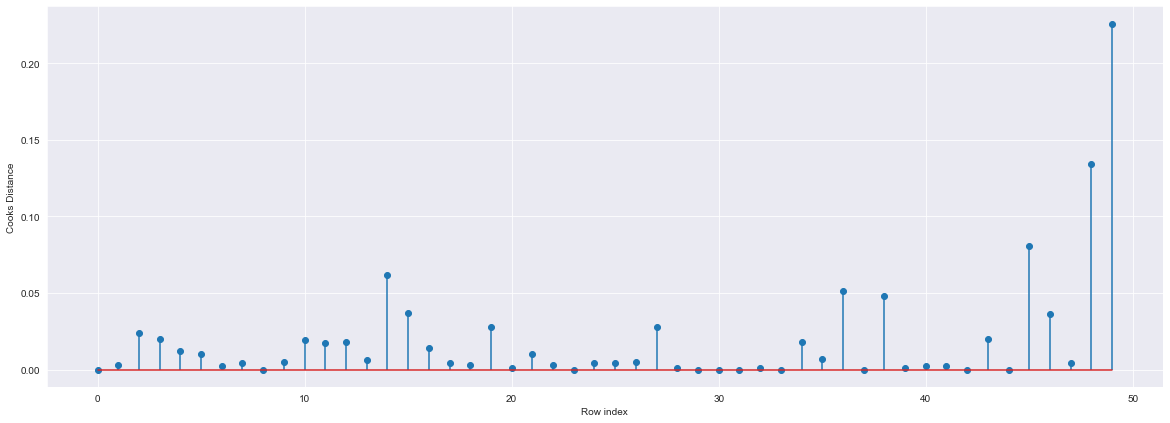

In [35]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Startups_50)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

In [37]:
np.where(c>0.42)

(array([], dtype=int64),)

# Final model

In [45]:
final_model= smf.ols('Profit~R_D+Marketing+State_California+State_Florida+State_New_York',data=Startups_50).fit()

In [46]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.72e-29
Time:                        12:36:08   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
R_D                  0.7967      0.042     18.771      0.000       0.711       0.882
Marketing            0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
State_Florida     1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
State_New_York    1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
new_data=pd.DataFrame({'R_D':451784.1,'Administration':155349.2,'Marketing':138897.8,'State_California':0,'State_Florida':1,'State_New_York':0},index=[0])
new_data

,R_D,Administration,Marketing,State_California,State_Florida,State_New_York
0,451784.1,155349.2,138897.8,0,1,0


In [43]:
Startups_50.head(1)

,R_D,Administration,Marketing,State_California,State_Florida,State_New_York,Profit
0,165349.2,136897.8,471784.1,0,0,1,192261.83


In [44]:
final_model.predict(new_data)

0    414024.903559
dtype: float64